In [2]:
import requests 
import os
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 

In [3]:
url = "https://rickandmortyapi.com/api/character"

In [4]:
#CREAR LA FUNCIÓN DE OBTENCIÓN DE PERSONAJES MEDIANTE EL USO DE API 

# Realización de la petición GET
respuesta = requests.get(url)  

# Imprimimos el código de estado en la respuesta (response)
print(f"Request {respuesta.status_code} : '{respuesta.reason}'")

#Otra forma fácil de saber si la conexión con la API es correcta es simplemente con el siguiente código: Tenemos que saber que 200 es el valor que nos interesa
#print(respuesta)

Request 200 : 'OK'


In [5]:
# Obtenemos los datos y los convertimos a JSON.
datos = respuesta.json()  

#Comprobamos que tenemos los datos. La librería pprint los imprime de manera ordenada
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(datos)
#Me sirve para ver como están distribuidos los datos en el json y hacer el siguiente código. 

{'info': {'count': 826,
          'next': 'https://rickandmortyapi.com/api/character?page=2',
          'pages': 42,
          'prev': None},
 'results': [{'created': '2017-11-04T18:48:46.250Z',
              'episode': ['https://rickandmortyapi.com/api/episode/1',
                          'https://rickandmortyapi.com/api/episode/2',
                          'https://rickandmortyapi.com/api/episode/3',
                          'https://rickandmortyapi.com/api/episode/4',
                          'https://rickandmortyapi.com/api/episode/5',
                          'https://rickandmortyapi.com/api/episode/6',
                          'https://rickandmortyapi.com/api/episode/7',
                          'https://rickandmortyapi.com/api/episode/8',
                          'https://rickandmortyapi.com/api/episode/9',
                          'https://rickandmortyapi.com/api/episode/10',
                          'https://rickandmortyapi.com/api/episode/11',
                      

In [6]:
#base_url = 'https://rickandmortyapi.com/api/characterdef'
#def obtener_datos_personajes():
#   personajes = []
  #  contador = 0
 #    while True:
  #       respuesta = requests.get(f'{base_url}?page={contador+1}')
  #       data = respuesta.json()
    #     resultado =  data.get('results')
     #   if  type(resultado) == type(None):
       #      break
         #else:
           #  personajes.extend(resultado)
             #contador+=1
     #return personajes
 #obtener_datos_personajes()

In [7]:
#Loop para conseguir un listado con todos los enlaces
URL2 = "https://rickandmortyapi.com/api/character/?page="
count=1
Nombres=[]
Status=[]
Species = []
Type=[]
Gender = []
Origin = []
Location= []
Image = []
Episode = []
while True:
    respuesta = requests.get(URL2 + str(count))
    if respuesta.status_code!= 200:
        break
    datos = respuesta.json() 
    for i in range (len(datos['results'])):
        name = datos['results'][i]['name']
        status= datos['results'][i]['status']
        species= datos['results'][i]['species']
        type = datos['results'][i]['type']
        gender = datos['results'][i]['gender']
        origin = datos['results'][i]['origin']['name']
        location = datos['results'][i]['location']['name']
        image = datos['results'][i]['image']
        episode = datos['results'][i]['episode'][::]
        Nombres.append(name)
        Status.append(status)
        Species.append(species)
        Type.append(type)
        Gender.append(gender)
        Origin.append(origin)
        Location.append(location)
        Image.append(image)
        Episode.append(episode)
    count +=1

#Buscar forma más elegante de poner esto


In [8]:
#lista zip que empareja cada dato de cada lista con el que le corresponde de las otras

lista_zip = zip(Nombres, Status, Species, Type, Gender, Origin, Location, Image, Episode)

#Creación del dataframe con los datos de la lista zip y los nombres de las columnas

df = pd.DataFrame(data = lista_zip, columns=['Nombres','Status', 'Species', 'Type', 'Gender', 'Origin', 'Location', 'Image', 'Episode'] )


In [9]:
df['Episode'] = df['Episode'].astype(str) #pasamos la columna episode a str para poder eliminar las partes que no nos interesan

In [10]:
df['Episode'] = df['Episode'].str.replace('https://rickandmortyapi.com/api/episode/','') #eliminamos los enlaces para quedarnos solo con los números(los episodios. Me da error al pasarlo a int)
df['Episode'] = df['Episode'].str.replace(' /','')
df

,Nombres,Status,Species,Type,Gender,Origin,Location,Image,Episode
0,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"['1', '2', '3', '4', '5', '6', '7', '8', '9', ..."
1,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"['1', '2', '3', '4', '5', '6', '7', '8', '9', ..."
2,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"['6', '7', '8', '9', '10', '11', '12', '14', '..."
3,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"['6', '7', '8', '9', '10', '11', '12', '14', '..."
4,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"['6', '7', '8', '9', '10', '11', '12', '13', '..."
...,...,...,...,...,...,...,...,...,...
821,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,['51']
822,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,['51']
823,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,['51']
824,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,['51']


In [11]:
#from IPython.core.display import HTML
#def display_image(url):
    #return f'<img src= "{url}"+ width= "60" >'

# informacion_actores: Dataframe con la información
# Imagen: Columna con la URL de las imánes de los actores y actrices

#df['Image'] = df['Image'].apply(display_image)
#display(HTML(df.to_html(escape=False ,render_links = True)))

#### Gráficas

In [12]:
df.dtypes

Nombres     object
Status      object
Species     object
Type        object
Gender      object
Origin      object
Location    object
Image       object
Episode     object
dtype: object

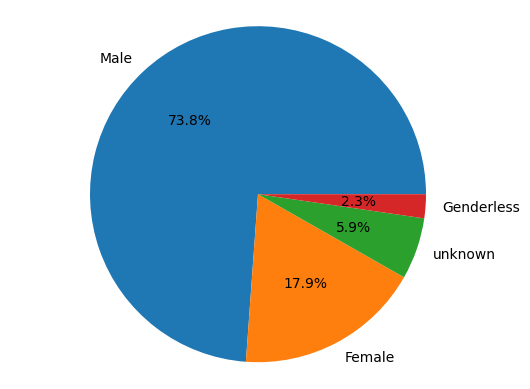

In [13]:
#Pie chart Gender
series = pd.Series(df['Gender'])
word_counts = series.value_counts()
plt.pie(word_counts, labels=word_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

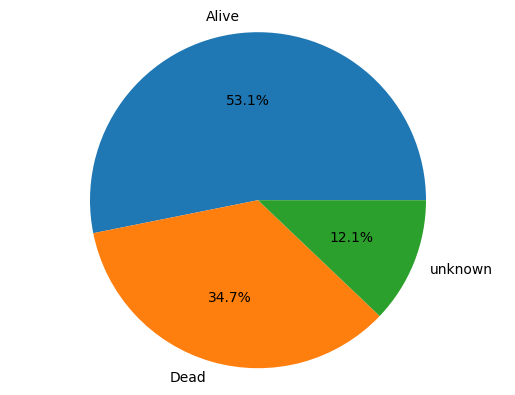

In [14]:
#Pie chart Status
series = pd.Series(df['Status'])
word_counts = series.value_counts()
plt.pie(word_counts, labels=word_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [23]:

fig = px.treemap(df, path=['Species'],height=700, title='Proporción de las especies',template= 'plotly_dark')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
